# Feature Selection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

## Separability and Scatter matrix
Separability is commonly measured with a scatter matrix.

Scatter matrix = $\sum[(\mu-x_k)(\mu-x_k)^T]$.  
Scatter matrix = outer product (u-x) * (u-x).  
For d dimensional data, scatter matrix size is (d x d).   
The (scatter matrix)/n is the maximum likelihood estimate of the covariance matrix, assuming normality.  

Note similarity to covariation matrix.  
cov(X,Y) = $\sigma(X,Y) = (1/n)\sum_1^n[(\mu_{x}-x)(\mu_{y}-y)^T]$  

Matrix M is positive definite if $z^TMz$ is positive for all real column vectors z.  
Matrix M is positive semi-definite if $z^TMz$ is non-negative for all real column vectors z.  
The scatter matrix is positive semi-definite.   

See wikipedia [scatter matrix](https://en.wikipedia.org/wiki/Scatter_matrix)

In [2]:
def scatter_matrix(X):
    """For 100 points in 2D space, X has size=(100,2)"""
    instances = X.shape[0]
    features = X.shape[1]
    means = np.mean(X)  # vector of feature means
    sm = np.zeros( (features,features) )
    for i in range(instances):
        deviation = means-X[i] # vector of feature deviations
        outer_product = np.outer(deviation,deviation)
        sm += outer_product
    return sm
        

Scatter matrix
[[19525.1125 -2255.2225]
 [-2255.2225 19013.4425]]
ML estimate of Covariance matrix
[[195.251125 -22.552225]
 [-22.552225 190.134425]]
Numpy estimate of Covariance matrix
[[196.22333333 -21.78      ]
 [-21.78       191.05494949]]


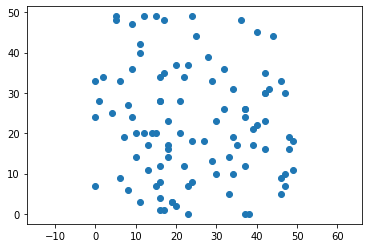

In [3]:
# One hundred uniformly scattered points.
N = 100
x = np.random.randint(0, 50, N)
y = np.random.randint(0, 50, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
sm = scatter_matrix(xy)
print('Scatter matrix')
print(sm)
mlcov = sm/N
print('ML estimate of Covariance matrix')
print(mlcov)
print('Numpy estimate of Covariance matrix')
obs = np.array( [x,y] )   # row of x values, row of values
print(np.cov(obs))

plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

Scatter matrix
[[4397.70033478  -15.84229777]
 [ -15.84229777  225.58714308]]
ML estimate of Covariance matrix
[[21.98850167 -0.07921149]
 [-0.07921149  1.12793572]]
Numpy estimate of Covariance matrix
[[22.09353631 -0.07414919]
 [-0.07414919  1.12814338]]


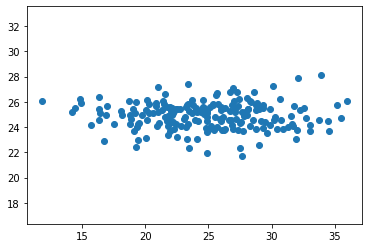

In [4]:
# Multivariate gaussian.
N = 200
mu = 25
sigma_x = 5
sigma_y = 1
x = np.random.normal(mu, sigma_x, N)
y = np.random.normal(mu, sigma_y, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
sm = scatter_matrix(xy)
print('Scatter matrix')
print(sm)
mlcov = sm/N
print('ML estimate of Covariance matrix')
print(mlcov)
print('Numpy estimate of Covariance matrix')
obs = np.array( [x,y] )   # row of x values, row of values
print(np.cov(obs))

plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

# Feature Selection
Which features can we do without? Which can we discard? 

Too many features is a problem due to

* NumFeatures > NumInstances
* Curse of dimensionality
* Worse-than-linear algorithm complexity
* Model confusion from irrelevent features
* Overfitting to variance in irrelevant features

After FEATURE EXTRACTION,   
we need to reduce complexity by  
FEATURE SELECTION or DIMENSIONALITY REDUCTION.

But finding the optimal subset is NP-hard.
Also, cannot just use features with high correlation (predictive value)
due to important feature-interaction effects. 
So there are heuristics and domain-specific rules.

## Separability
Generally, define separability of a scalar quantity and try to maximize it.  
Separability sets the upper limit on the learning accuracy.  
Here are choices, all of which use between-group scatter / within-group scatter.

* $J = tr(S_B)/tr(S_W)$
* $J = tr(S_W^{-1}S_B)$
* $J = det(S_W^{-1}S_B)$
* $J = ln[det(S_W^{-1}S_B)]$


## Correlation
Pearson's correlation between feature f and class y   
$R = \frac {cov(f,y)} {\sqrt{var(f)var(y)}}$   
$R = \frac {\sum[(f-\bar{f})(y-\bar{y})]} {\sqrt{\sum[(f-\bar{f})^2\sum(y-\bar{y})^2]}}$ 
Usually use $|R|$ or $R^2$.  

Problem: Correlation only detects linear relationships.  
Important features may be predictive of class collectively 
but uncorrelated to class individually.

## Mutual Information
Can detect non-linear relationships but is harder to compute.

Information:  
$I(x) = p(x) ln(p(x))$  
Mutual information between feature xi and class y:  
$I(x_i,y) = p(x_i,y) ln[p(x_i,y)/p(x_i)p(y)]$

With discrete variables, 
and using frequencies as empirical estimates of probabilities:  
$I(X,Y) = \sum_x \sum_y P(X=x,Y=y) ln[P(X=x,Y=y)/P(X=x)P(Y=y)]$

## Filter vs Wrapper methods
Feature selection by 
* Filter methods ... are independent of any model. Also called unsupervised. Often based on outlier detection with clustering. May not be optimal for a chosen model. 
* Wrapper methods ... are specific to a model. Also called supervised. Test goodness by cross-validation using the model of interest.

Methods for feature selection with a wrapper 
* Forward selection ... start with one and iteratively add more.   
* Reverse selection ... start with full set and iteratively remove some.  
* Bidirectional selection ... after adding a good one, check if others could be removed.

Note these are greedy and compute-intense.